# U.S. Medical Insurance Costs

`Goal:` explore the data and find relationships between variables.

`Questions to answer:`
1. What is the average age in the dataset?
2. Whom we have more males or females?
3. Who has the largest and the smallest insurance cost?
4. What is the InterQuartile Range of insurance cost?
5. What is the average difference between actual and expected insurance cost?

In [85]:
#Importing necessary modules and putting data into its lists
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

age, sex, bmi, children, smoker, region, charges = [], [], [], [], [], [], []

with open('insurance.csv') as insurance_csv:
    insurance_data = csv.DictReader(insurance_csv)
    for row in insurance_data:
        age.append(int(row['age']))
        sex.append(row['sex'])
        bmi.append(float(row['bmi']))
        children.append(int(row['children']))
        if row['smoker']=='yes':
            smoker.append(1)
        else:
            smoker.append(0)
        region.append(row['region'])
        charges.append(float(row['charges']))

### #1 What is the average age in the dataset?

In [86]:
# Defining a function that calculate average value
def average(values):
    total = 0
    for i in values:
        total += i
    return round(total/len(values), 0)

In [87]:
print('Average age in the dataset is {} years old'.format(average(age)))

Average age in the dataset is 39.0 years old


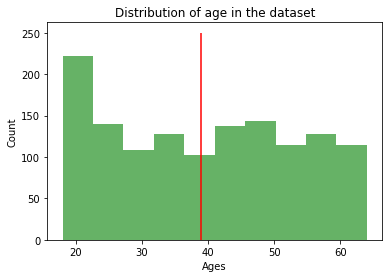

<Figure size 432x288 with 0 Axes>

In [88]:
# Making a histogram of age
plt.hist(age, color='green', alpha=0.6, bins=10)
plt.vlines(x=39.0, ymin=0, ymax=250, color='red')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of age in the dataset')
plt.show()
plt.clf()

### #2 Whom we have more, males or females?

In [89]:
def males_vs_females(sex_list):
    males = sex_list.count('male')
    females = sex_list.count('female')
    return ('males', males), ('females', females)

In [90]:
sex_result = males_vs_females(sex)
print('Males {}, Females {}'.format(sex_result[0][1], sex_result[1][1]))

Males 676, Females 662


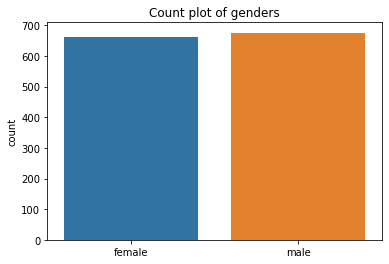

In [91]:
# Making a countplot
sns.countplot(x = sex)
plt.title('Count plot of genders')
plt.show()

### #3 Who has the largest and the smallest insurance cost?

In [92]:
# Defining a function that finds a person with the largest insurance cost
def largest_insurance_cost(age_list, sex_list, bmi_list, children_list, smoker_list, region_list, charges_list):
    information = []
    max = -1
    for i in range(len(charges_list)):
        if max < charges_list[i]:
            max = charges_list[i]
            information = [age_list[i], sex_list[i], bmi_list[i], children_list[i], smoker_list[i], region_list[i], charges_list[i]]
    return information

In [93]:
lcost_result = largest_insurance_cost(age, sex, bmi, children, smoker, region, charges)
print('Age {}, Gender {}, BMI {}, Number of children {}, Smoker {}, Region {}, Amount charged {}'.format(lcost_result[0], lcost_result[1], lcost_result[2], lcost_result[3], lcost_result[4], lcost_result[5], lcost_result[6]))

Age 54, Gender female, BMI 47.41, Number of children 0, Smoker 1, Region southeast, Amount charged 63770.42801


In [94]:
# Defining a function that finds a person with the smalest insurance cost
def smallest_insurance_cost(age_list, sex_list, bmi_list, children_list, smoker_list, region_list, charges_list):
    information = []
    min = 10000000000000000000000000000000
    for i in range(len(charges_list)):
        if min > charges_list[i]:
            min = charges_list[i]
            information = [age_list[i], sex_list[i], bmi_list[i], children_list[i], smoker_list[i], region_list[i], charges_list[i]]
    return information

In [95]:
scost_result = smallest_insurance_cost(age, sex, bmi, children, smoker, region, charges)
print('Age {}, Gender {}, BMI {}, Number of children {}, Smoker {}, Region {}, Amount charged {}'.format(scost_result[0], scost_result[1], scost_result[2], scost_result[3], scost_result[4], scost_result[5], scost_result[6]))

Age 18, Gender male, BMI 23.21, Number of children 0, Smoker 0, Region southeast, Amount charged 1121.8739


### #4 What is the InterQuartile Range of insurance cost?

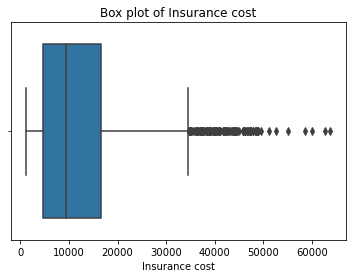

In [96]:
# Making a boxplot of insurance costs
sns.boxplot(x=charges)
plt.xlabel('Insurance cost')
plt.title('Box plot of Insurance cost')
plt.show()

In [99]:
print('IQR is {}, Q2 is {}, Median is {}, Q3 is {}'.format(stats.iqr(charges), np.quantile(charges, 0.25), np.median(charges), np.quantile(charges, 0.75)))

IQR is 11899.625365, Q2 is 4740.28715, Median is 9382.033, Q3 is 16639.912515


### #5 What is the average difference between actual and expected insurance cost?

In [ ]:
def estimated_insurance_cost(age, sex, bmi, children, smoker):
    estimated_cost = 250*age - 128*sex + 370*bmi + 425*children + 24000*smoker - 12500
    return estimated_cost

def average_estimated_insurance_cost(age_list, sex_list, bmi_list, children_list, smoker_list, charges):
    total = 0
    for i in range(len(sex_list)):
        if sex_list[i] == 'male':
            sex_list[i] = 1
        else:
            sex_list[i] = 0
    for i in range(len(age_list)):
        difference = abs(charges[i] - estimated_insurance_cost(age_list[i], sex_list[i], bmi_list[i], children_list[i], smoker_list[i]))
        total += difference
    return round(total/len(age_list), 2)

In [102]:
av_es_result = average_estimated_insurance_cost(age, sex, bmi, children, smoker, charges)
print('Average difference between actual and expected insurance cost is {}'.format(av_es_result))

Average difference between actual and expected insurance cost is 4458.18


## `Conclusion`


#### #1 What is the average age in the dataset?

The average age in the dataset is 39 years.

#### #2 Whom we have more males or females?

We have almost equal amount of males and females, males - 676, females - 662.

#### #3 Who has the largest and the smallest insurance cost?

The largest insurance cost has 54 year old woman, with a BMI of 47.41, without any children and she smokes, her insurance cost equals 63770.43 dollars. 
The smallest insurance cost has 18 year old boy, with a BMI of 23.21, without any children and  he doesn't smoke, his insurance cost equals 1121.87 dollars.

#### #4. What is the InterQuartile Range of insurance cost?

The IQR of insurance cost equals 11899.62 dollars.

#### #5 What is the average difference between actual and expected insurance cost?

The average difference between actual and expected insurance cost is 4458.18 dollars.